### Ch11 Figure1

In [1]:
# The knowledge explorer would work with the data analyst to break these down into reports. Maybe they could create reports on the customer’s income. They could also analyze social media platforms and create a word cloud of feedback from thousands of customers. For example, some of the largest words in the word cloud were "travel," "recipe," and "restaurant." The team could go back and ask more questions. Why do our customers like to travel? Where are they going?

data = []

for i in range(5000):
    data.append([i, (np.random.gamma(2,3)+10)*1000, (np.random.normal(100, 50)+100)])

df = pd.DataFrame(data, columns=['id', 'income', 'spend'])
# df.to_csv('csv_output/ch11_fig1.csv', index=False)
df = pd.read_csv('csv_output/ch11_fig1.csv')
df.head()

,id,income,spend
0,0,18467.243329,235.153851
1,1,12377.553989,220.005619
2,2,26717.588598,260.639826
3,3,20959.055196,207.430432
4,4,13459.267852,231.046424


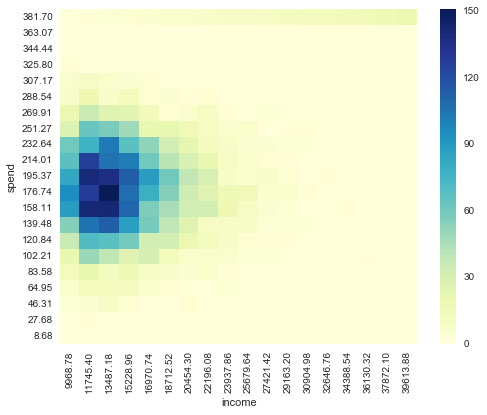

In [2]:
df = pd.read_csv('csv_output/ch11_fig1.csv')

df['income_cut'], income_bins = pd.cut(df['income'],bins=20, labels=np.arange(1,21),retbins=True)
df['spend_cut'], spend_bins = pd.cut(df['spend'],bins=20, labels=np.arange(1,21),retbins=True)
gb = df.groupby(['income_cut', 'spend_cut']).id.count().reset_index()

%matplotlib inline
sns.set_style("whitegrid")

f, ax = plt.subplots(1, figsize=(8,6))

sns.heatmap(gb.pivot('income_cut', 'spend_cut').fillna(0).reset_index().transpose(), cmap="YlGnBu", ax=ax);
ax.set_ylabel('spend');
ax.set_yticklabels(['%.2f'%x for x in  spend_bins]);
ax.set_xlabel('income');
ax.set_xticklabels(['%.2f'%x for x in  income_bins]);

for tick in ax.get_xticklabels():
    tick.set_rotation(90);

f.savefig('svg_output/ch11_fig1.svg', format='svg')

The x-axis is the income and the y-axis in the spend, people with higher income not necessarily spend more, those around 20k ~ 30k seem to have the highest spend among all.